# Project Group - 2
**A stormy flight: Investigating the correlation between weather patterns and delays on the JFK-LAX route**


Members: Nynke Leppink, Alexander du Marchie Sarvaas, Samuel du Marchie Sarvaas, Sanne van Proosdij, Emma Toet

Student numbers: 5070988, 5547156, 4802829, 5326990, 4849892 

# Introduction

Flight delays are a common source of irritation for many travellers. Factors such as weather and technical issues frequently cause these disruptions. For frequent flyers, dealing with delays has become an unfortunate norm. This report will explore flight delays on the route between John F. Kennedy International Airport (JFK) and Los Angeles International Airport (LAX), which is one of the busiest air routes in the world, with over 150 flights per week. LAX ranks among the top ten busiest airports globally [1]. The report will examine how weather conditions at JFK and LAX impact flight delays on this route.

[1] https://www.airport-technology.com/features/the-top-10-busiest-airports-in-the-world/ 

# Research objective
For this research the following question will be answered: "How do weather conditions at JFK (New York) and LAX (Los Angeles) affect flight delays on this flight route?"

To answer this question a dataset of flight information from the year 2013 will be used [2]. This dataset contains flight information of different flight routes in the United States. This research focuses on the flight route between John F. Kennedy International Airport (JFK) in New York and Los Angeles International Airport (LAX). The information in this dataset can be used to analyse the departure and arrival delays of these airports. 

For the weather conditions at JFK and LAX the weather information of Iowa Environmental Mesonet will be used [3]. On this website different weather variables are available and will be combined in one dataset. 

**Sub questions**
1. What is the relationship between (severe) weather patterns and the duration and occurence of flight delays, and how does this vary depending on the point of departure and arrival? \   
2. Which specific weather conditions (e.g., visibility, wind speed and wind gust, sky level coverage, precipitation and pressure altimeter) most significantly impact flight delays on the JFK-LAX route? \
3. How does the time of year affect the relationship between weather conditions and flight delays ( and how can this be used for more accurate future delay predictions)? \
4. How do the operational performances of various airlines, such as their on-time records, differ in response to weather disruptions along the JFK-LAX route? \
5. Are there unexpected patterns in flight delays based on the time of day and specific weather conditions, such as for example increased delays during morning rush hours in bad weather?  Or were there unexpected delays due to factors not having anything to do with weather. \

The information of both datasets will be analysed to answer the research- and the sub question.


References:
[2]  https://www.kaggle.com/datasets/mahoora00135/flights?resource=download \
[3] https://mesonet.agron.iastate.edu/request/download.phtml?network=NY_ASOS# 


# Conditions and restrains
In this study, there are several constraints that influence the analysis and findings. One of the most important factors is weather conditions, which include a variety of elements that are important to understanding flight operations. The study will consider factors such as visibility, wind speed and wind gust, sky level coverage, precipitation and pressure altimeter. 
The to-be-used datasat has five airlines operating this route: United Airlines Inc., Virgin America, JetBlue Airways, American Airlines Inc., and Delta Air Lines Inc. By investigating the performance of these airlines, the aim is to identify trends and correlations between weather conditions and flight operations. This will enable a better understanding of how various factors impact delays throughout the year.

The temporal scope of the study covers the year 2013, which provides a big dataset for analysis. The dataset (consisting of more than 11.000 flights) has flights at an hourly level, monitoring approximately 30 flights each day. 

Geographically, the analysis will concentrate on the route between two major international airports: John F. Kennedy International Airport (JFK) in New York and Los Angeles International Airport (LAX). By focusing on these key locations, the weather conditions specific to each airport will be explored.

# Quantitative Analysis
To better understand the impact of weather on flight delays between JFK and LAX three statistical analyses will be performed. 


**Descriptive Statistics**: A first objective is to calculate the mean of flight delays on clear days compared to bad weather days. This will provide insights into how different weather conditions can affect delay durations. \
**Correlation Analysis**: A second objective is assessing the relationship between various weather variables, such as wind speed and precipitation, and the duration of flight delays. This analysis can help identify which weather factors have the strongest influence on delays. (In case we want to expand with a predictive model). \
**Regression Analysis**: To predict flight delays, multiple linear regression or logistic regression analyses will be conducted. These models will consider multiple factors, including weather conditions and the day of the week, to determine their combined effect on delay occurrence and duration. 

# Visualisation 
Here, different ways of translating the findings into comprehensible visualisations will be used. 
Maps: Heatmaps showing concentration of delays by geographic area.
Graphs: 
1. Line graphs to display delays over time, categorised by weather types (e.g., delays during rain vs. delays during clear days). \
2. Bar charts showing the average delay duration by month or airline. \
3. Scatter Plots: To visualise correlations between variables (e.g., wind speed vs. delay duration).


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

For the proposal we collabarated together.

**Author 1**:

**Author 2**:

**Author 3**:

**Author 4**:

**Author 5**:

# Data Used

The datasets used are described in the research objective

# Data Pipeline

The dataframe for the weather variables at JFK are modified in tbe following cell and the output of the dataframe is given.

In [55]:
import pandas as pd
import numpy as np
weather_JFK = pd.read_csv('JFK.csv')
weather_JFK[['Date', 'Time']] = weather_JFK['valid'].str.split(' ', expand=True)


weather_JFK = weather_JFK.drop(['tmpf', 'dwpf', 'relh', 'drct', 'mslp', 'skyl1',
                                "skyl2",  'skyl3', 'skyl4',  'wxcodes', 'feel', 'ice_accretion_1hr', 'ice_accretion_3hr',
                                'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'snowdepth', 'metar'], axis=1)

weather_JFK = weather_JFK[['station', 'Date', 'Time', 'sknt', 'gust', 'p01i', 'alti', 'vsby', 'skyc1', 'skyc2', 'skyc3', 'skyc4']]
weather_JFK.rename(columns={
    'sknt': 'Wind Speed [in knots]',
    'gust': 'Wind Gust [in knots]',
    'vsby': 'Visibility [in miles]',
    'p01i': 'One hour precipitation [in inches]',
    'alti': 'Pressure altimeter [in inches]',
    'skyc1': 'Sky Level 1 Coverage',
    'skyc2': 'Sky Level 2 Coverage',
    'skyc3': 'Sky Level 3 Coverage',
    'skyc4': 'Sky Level 4 Coverage'
}, inplace = True)

weather_JFK = weather_JFK[weather_JFK['Time'].str.endswith(':51')]
display(weather_JFK)

,station,Date,Time,Wind Speed [in knots],Wind Gust [in knots],One hour precipitation [in inches],Pressure altimeter [in inches],Visibility [in miles],Sky Level 1 Coverage,Sky Level 2 Coverage,Sky Level 3 Coverage,Sky Level 4 Coverage
0,JFK,2013-01-01,00:51,14.0,NaN,0.00,29.96,10.0,OVC,NaN,NaN,NaN
1,JFK,2013-01-01,01:51,15.0,NaN,0.00,29.93,10.0,OVC,NaN,NaN,NaN
2,JFK,2013-01-01,02:51,17.0,NaN,0.00,29.92,10.0,OVC,NaN,NaN,NaN
3,JFK,2013-01-01,03:51,16.0,NaN,0.00,29.92,10.0,OVC,NaN,NaN,NaN
4,JFK,2013-01-01,04:51,13.0,NaN,0.00,29.92,10.0,OVC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9828,JFK,2013-12-31,19:51,12.0,NaN,0.00,30.09,10.0,FEW,BKN,BKN,NaN
9829,JFK,2013-12-31,20:51,16.0,NaN,T,30.12,9.0,BKN,BKN,NaN,NaN
9830,JFK,2013-12-31,21:51,18.0,26.0,T,30.13,10.0,FEW,SCT,NaN,NaN
9831,JFK,2013-12-31,22:51,18.0,24.0,0.00,30.15,10.0,FEW,NaN,NaN,NaN


The dataframe for the weather variables at LAX are modified in tbe following cell and the output of the dataframe is given.

In [56]:
weather_LAX = pd.read_csv('LAX.csv')
weather_LAX[['Date', 'Time']] = weather_LAX['valid'].str.split(' ', expand=True)

weather_LAX = weather_LAX.drop(['tmpf', 'dwpf', 'relh', 'drct', 'mslp', 'skyl1',
                                "skyl2",  'skyl3', 'skyl4',  'wxcodes', 'feel', 'ice_accretion_1hr', 'ice_accretion_3hr',
                                'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'snowdepth', 'metar'], axis=1)

weather_LAX = weather_LAX[['station', 'Date', 'Time', 'sknt', 'gust', 'p01i', 'alti', 'vsby', 'skyc1', 'skyc2', 'skyc3', 'skyc4']]
weather_LAX.rename(columns={
    'sknt': 'Wind Speed [in knots]',
    'gust': 'Wind Gust [in knots]',
    'vsby': 'Visibility [in miles]',
    'p01i': 'One hour precipitation [in inches]',
    'alti': 'Pressure altimeter [in inches]',
    'skyc1': 'Sky Level 1 Coverage',
    'skyc2': 'Sky Level 2 Coverage',
    'skyc3': 'Sky Level 3 Coverage',
    'skyc4': 'Sky Level 4 Coverage'
}, inplace = True)


weather_LAX = weather_LAX[weather_LAX['Time'].str.endswith(':53')]
display(weather_LAX)

,station,Date,Time,Wind Speed [in knots],Wind Gust [in knots],One hour precipitation [in inches],Pressure altimeter [in inches],Visibility [in miles],Sky Level 1 Coverage,Sky Level 2 Coverage,Sky Level 3 Coverage,Sky Level 4 Coverage
0,LAX,2013-01-01,00:53,8.0,NaN,0.00,30.21,10.0,FEW,NaN,NaN,NaN
1,LAX,2013-01-01,01:53,7.0,NaN,0.00,30.21,10.0,FEW,NaN,NaN,NaN
2,LAX,2013-01-01,02:53,4.0,NaN,0.00,30.21,10.0,CLR,NaN,NaN,NaN
3,LAX,2013-01-01,03:53,5.0,NaN,0.00,30.23,10.0,FEW,NaN,NaN,NaN
4,LAX,2013-01-01,04:53,3.0,NaN,0.00,30.24,10.0,FEW,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10042,LAX,2013-12-31,19:53,7.0,NaN,0.00,30.15,10.0,FEW,SCT,NaN,NaN
10043,LAX,2013-12-31,20:53,6.0,NaN,0.00,30.12,10.0,FEW,SCT,NaN,NaN
10045,LAX,2013-12-31,21:53,6.0,NaN,0.00,30.11,10.0,FEW,SCT,NaN,NaN
10046,LAX,2013-12-31,22:53,7.0,NaN,0.00,30.10,10.0,FEW,SCT,NaN,NaN


The flight dataset has been modified from its original form, filtering it to only include the flights from JFK to LAX. Some unnecesary columns have been removed, and the time have been cleaned. The original dataset cannot be uploaded in github because of the size, only the modified version is uploaded. 

In [57]:
import pandas as pd
flights = pd.read_csv('Vluchten_2013_dataset.csv')
NYLA = flights[(flights['origin'] == 'JFK') & (flights['dest'] == 'LAX')]


In [58]:
NYLA['date'] = pd.to_datetime(NYLA[['year', 'month', 'day']])
NYLA = NYLA.drop(['id', 'year', 'month', 'day', 'time_hour', 'distance', 'hour', 'minute', 'carrier', 'flight', 'origin', 'dest',], axis=1)
cols = ['date'] + [col for col in NYLA if col != 'date']
NYLA = NYLA[cols]
NYLA = NYLA.sort_values(by='date')
NYLA = NYLA.dropna(axis=0)
NYLA = NYLA.reset_index()
NYLA = NYLA.drop(['index'], axis=1)

/var/folders/nh/tj10d_nj0rg27q3sh231hw8r0000gn/T/ipykernel_36979/1040830742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYLA['date'] = pd.to_datetime(NYLA[['year', 'month', 'day']])


In [59]:
#function to convert departure and arrival times in floats, to datetime objects

def convert_to_time(time_value):
    time_value = int(time_value)
    
    if time_value < 100:  # If it's less than 100, it's only minutes
        return f"00:{time_value:02d}"
    else:
        time_str = str(time_value).zfill(4)
        hour = int(time_str[:2])
        minute = int(time_str[2:])
        return f"{hour:02d}:{minute:02d}"
    
    
timecolumns = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time'] 

for col in timecolumns:
    NYLA[col] = NYLA[col].apply(convert_to_time)

In [60]:
NYLA.tail()

,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,tailnum,air_time,name
11154,2013-12-31,07:24,07:00,24.0,11:03,10:25,38.0,N627VA,362.0,Virgin America
11155,2013-12-31,06:59,07:00,-1.0,10:15,10:15,0.0,N768JB,355.0,JetBlue Airways
11156,2013-12-31,06:30,06:31,-1.0,09:55,09:58,-3.0,N589UA,355.0,United Air Lines Inc.
11157,2013-12-31,15:31,15:30,1.0,19:18,19:03,15.0,N199DN,363.0,Delta Air Lines Inc.
11158,2013-12-31,11:32,11:29,3.0,14:48,14:46,2.0,N595UA,346.0,United Air Lines Inc.


In [61]:
NYLA.to_csv('FLIGHT_csv_clean.csv', index=False)

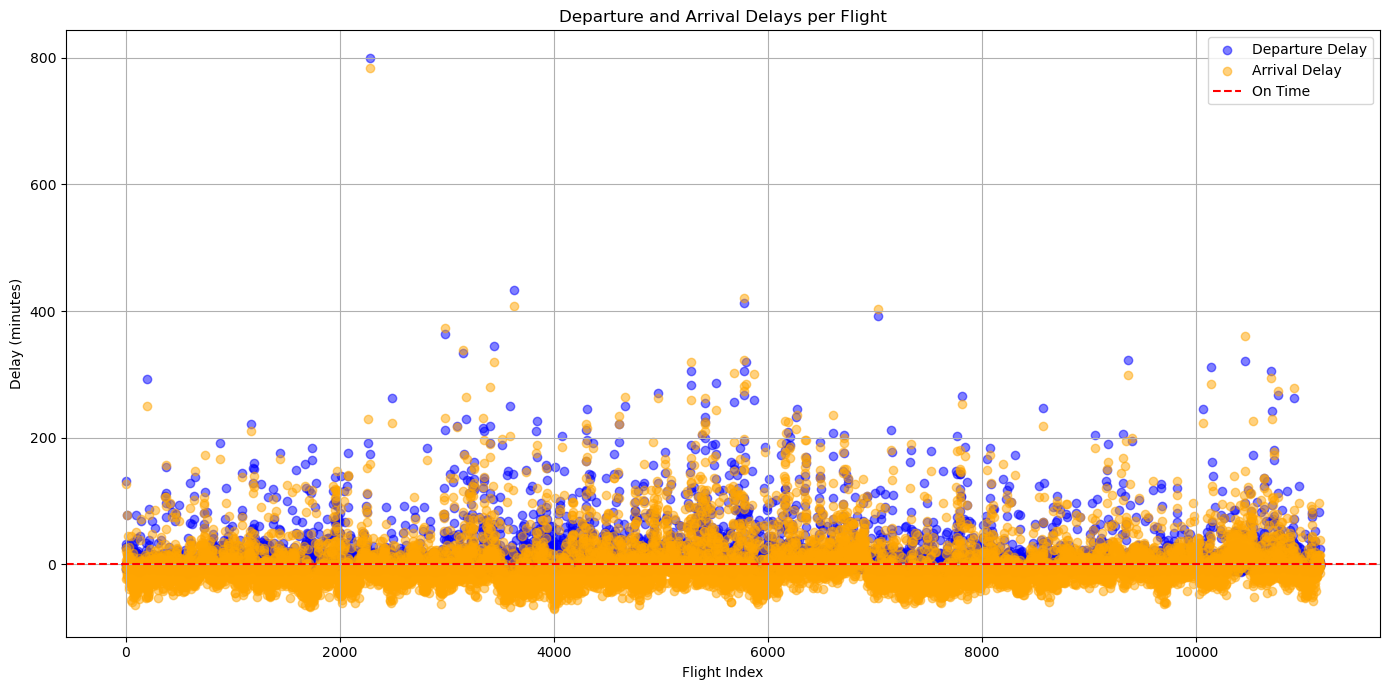

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'FLIGHT_csv_clean.csv'  # Replace with your actual file path
NYLA = pd.read_csv(file_path)

# Step 2: Convert the 'date' column to datetime format (if you need it later)
NYLA['date'] = pd.to_datetime(NYLA['date'])  # Ensure this is the correct column

# Step 3: Create a scatter plot
plt.figure(figsize=(14, 7))

# Plotting departure delays
plt.scatter(NYLA.index, NYLA['dep_delay'], label='Departure Delay', alpha=0.5, color='blue')

# Plotting arrival delays
plt.scatter(NYLA.index, NYLA['arr_delay'], label='Arrival Delay', alpha=0.5, color='orange')

# Step 4: Adding labels and title
plt.title('Departure and Arrival Delays per Flight')
plt.xlabel('Flight Index')
plt.ylabel('Delay (minutes)')
plt.axhline(0, color='red', linestyle='--', label='On Time')
plt.legend()
plt.grid()
plt.tight_layout()

# Step 5: Show the plot
plt.show()


In [63]:
import pandas as pd

# Step 1: Import another CSV for just this section
flight_data = pd.read_csv('FLIGHT_csv_clean.csv')  # Replace with the actual path to the second dataset

# Step 2: Count the number of flights per airline in the second dataset
flight_counts = flight_data['name'].value_counts()  # Replace 'name' with the actual column name in the second dataset

# Step 3: Print the total number of flights for each airline
for name, count in flight_counts.items():
    print(f'Total flights for {name}: {count}')

Total flights for American Airlines Inc.: 3187
Total flights for Delta Air Lines Inc.: 2487
Total flights for United Air Lines Inc.: 2037
Total flights for Virgin America: 1779
Total flights for JetBlue Airways: 1669


/var/folders/nh/tj10d_nj0rg27q3sh231hw8r0000gn/T/ipykernel_36979/586731579.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Flights', y='Airline', data=data, palette='viridis')


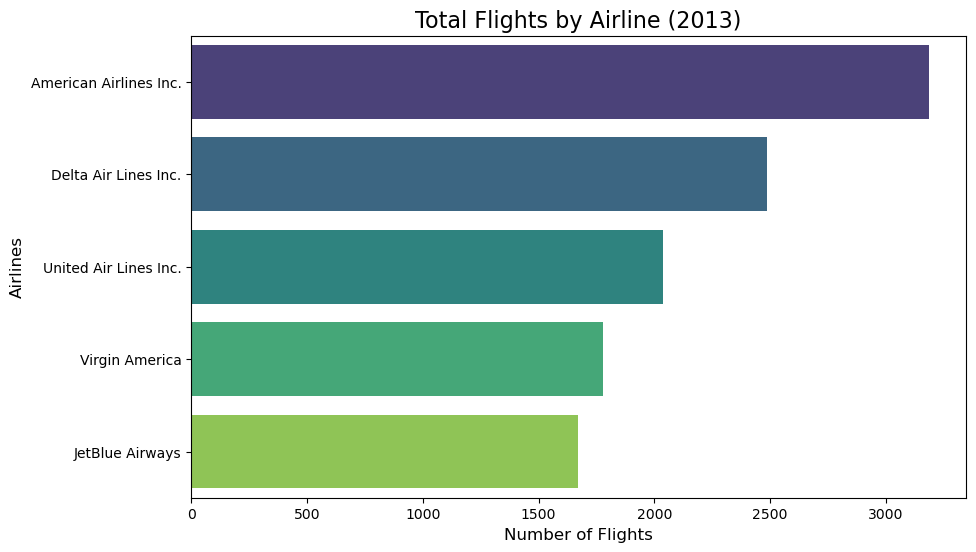

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
airlines = [
    'American Airlines Inc.',
    'Delta Air Lines Inc.',
    'United Air Lines Inc.',
    'Virgin America',
    'JetBlue Airways'
]

flight_counts = [3187, 2487, 2037, 1779, 1669]

# Step 2: Create a DataFrame for better plotting with seaborn
import pandas as pd

data = pd.DataFrame({
    'Airline': airlines,
    'Total Flights': flight_counts
})

# Step 3: Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Flights', y='Airline', data=data, palette='viridis')

# Step 4: Add titles and labels
plt.title('Total Flights by Airline (2013)', fontsize=16)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Airlines', fontsize=12)

# Step 5: Show the plot
plt.show()


In [65]:
import pandas as pd

# Assuming NYLA is already loaded as a DataFrame
NYLA = pd.read_csv('FLIGHT_csv_clean.csv')  # Load your dataset here if not already done

# Step 1: Grouping by airline name and calculating mean departure delay
average_dep_delay_per_airline = NYLA.groupby('name')['dep_delay'].mean().reset_index()

# Step 2: Sorting airlines by departure delay
average_dep_delay_per_airline = average_dep_delay_per_airline.sort_values(by='dep_delay')

# Step 3: Printing the sorted average departure delay
print("Average Departure Delay per Airline:")
print(average_dep_delay_per_airline)

# Step 4: Grouping by airline name and calculating mean arrival delay
average_arr_delay_per_airline = NYLA.groupby('name')['arr_delay'].mean().reset_index()

# Step 5: Sorting airlines by arrival delay
average_arr_delay_per_airline = average_arr_delay_per_airline.sort_values(by='arr_delay')

# Step 6: Printing the sorted average arrival delay
print("\nAverage Arrival Delay per Airline:")
print(average_arr_delay_per_airline)


Average Departure Delay per Airline:
                     name  dep_delay
1    Delta Air Lines Inc.   5.685565
3   United Air Lines Inc.   7.631811
2         JetBlue Airways   8.938886
0  American Airlines Inc.   9.499216
4          Virgin America  10.947723

Average Arrival Delay per Airline:
                     name  arr_delay
1    Delta Air Lines Inc.  -3.845195
0  American Airlines Inc.  -1.927204
3   United Air Lines Inc.   1.592538
2         JetBlue Airways   2.013781
4          Virgin America   2.100618


In [66]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'FLIGHT_csv_clean.csv'  # Replace with your actual file path
NYLA = pd.read_csv(file_path)

# Step 2: Convert the 'date' column to datetime format
NYLA['date'] = pd.to_datetime(NYLA['date'])  # Ensure this is the correct column

# Step 3: Extract week and year from the date column
NYLA['week'] = NYLA['date'].dt.isocalendar().week  # ISO calendar week
NYLA['year'] = NYLA['date'].dt.year  # Extract year

# Step 4: Calculate average delays per week
average_delays_per_week = NYLA.groupby(['year', 'week'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Step 5: Rename columns for clarity
average_delays_per_week.columns = ['Year', 'Week', 'Average Departure Delay', 'Average Arrival Delay']

# Step 6: Display the results
print(average_delays_per_week)

    Year  Week  Average Departure Delay  Average Arrival Delay
0   2013     1                 3.497942              -9.757202
1   2013     2                 5.043062              -6.846890
2   2013     3                 1.275362              -9.541063
3   2013     4                 3.293269               3.024038
4   2013     5                 2.495146              -2.679612
5   2013     6                 5.299435              -2.779661
6   2013     7                 6.777778             -11.449275
7   2013     8                 2.803828              -5.038278
8   2013     9                 7.440758             -23.303318
9   2013    10                10.108491              -1.400943
10  2013    11                 5.342593              -8.625000
11  2013    12                 6.752294               3.472477
12  2013    13                 1.330275             -13.032110
13  2013    14                 2.065421              -4.023364
14  2013    15                 8.481651              -1

    Year  Week  Average Departure Delay  Average Arrival Delay
0   2013     1                 3.497942              -9.757202
1   2013     2                 5.043062              -6.846890
2   2013     3                 1.275362              -9.541063
3   2013     4                 3.293269               3.024038
4   2013     5                 2.495146              -2.679612
5   2013     6                 5.299435              -2.779661
6   2013     7                 6.777778             -11.449275
7   2013     8                 2.803828              -5.038278
8   2013     9                 7.440758             -23.303318
9   2013    10                10.108491              -1.400943
10  2013    11                 5.342593              -8.625000
11  2013    12                 6.752294               3.472477
12  2013    13                 1.330275             -13.032110
13  2013    14                 2.065421              -4.023364
14  2013    15                 8.481651              -1

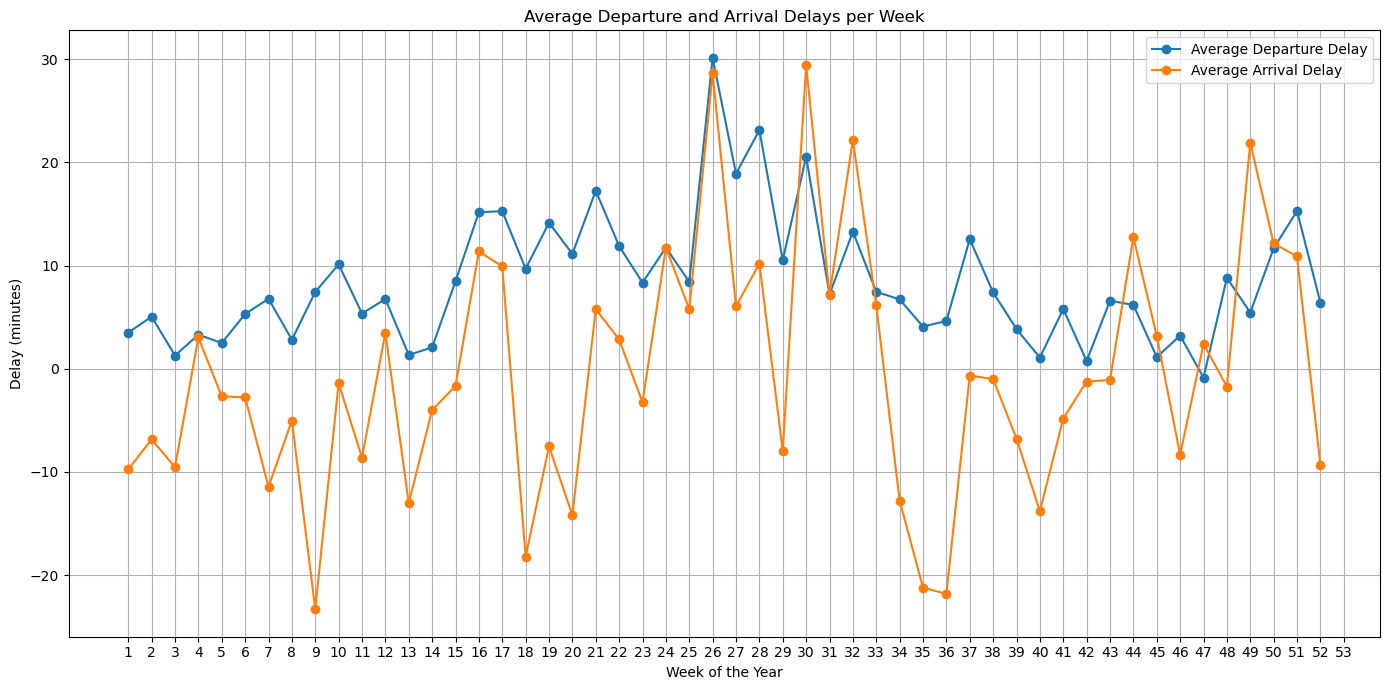

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'FLIGHT_csv_clean.csv'  # Replace with your actual file path
NYLA = pd.read_csv(file_path)

# Step 2: Convert the 'date' column to datetime format
NYLA['date'] = pd.to_datetime(NYLA['date'])  # Ensure this is the correct column

# Step 3: Extract week and year from the date column
NYLA['week'] = NYLA['date'].dt.isocalendar().week  # ISO calendar week
NYLA['year'] = NYLA['date'].dt.year  # Extract year

# Step 4: Calculate average delays per week
average_delays_per_week = NYLA.groupby(['year', 'week'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Step 5: Rename columns for clarity
average_delays_per_week.columns = ['Year', 'Week', 'Average Departure Delay', 'Average Arrival Delay']

# Step 6: Display the results
print(average_delays_per_week)

# Step 7: Visualize the average delays with a line chart
plt.figure(figsize=(14, 7))
plt.plot(average_delays_per_week['Week'], average_delays_per_week['Average Departure Delay'], label='Average Departure Delay', marker='o')
plt.plot(average_delays_per_week['Week'], average_delays_per_week['Average Arrival Delay'], label='Average Arrival Delay', marker='o')
plt.title('Average Departure and Arrival Delays per Week')
plt.xlabel('Week of the Year')
plt.ylabel('Delay (minutes)')
plt.xticks(range(1, 54))  # Adjust for weeks 1 to 53
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'FLIGHT_csv_clean.csv'  # Replace with your actual file path
NYLA = pd.read_csv(file_path)

# Step 2: Convert the 'date' column to datetime format
NYLA['date'] = pd.to_datetime(NYLA['date'])  # Ensure this is the correct column

# Step 3: Extract month and year from the date column
NYLA['month'] = NYLA['date'].dt.month  # Extract month
NYLA['year'] = NYLA['date'].dt.year    # Extract year

# Step 4: Calculate average delays per month
average_delays_per_month = NYLA.groupby(['year', 'month'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Step 5: Rename columns for clarity
average_delays_per_month.columns = ['Year', 'Month', 'Average Departure Delay', 'Average Arrival Delay']

# Step 6: Display the results
print(average_delays_per_month)


    Year  Month  Average Departure Delay  Average Arrival Delay
0   2013      1                 3.091006              -6.396146
1   2013      2                 4.880952              -8.195489
2   2013      3                 6.238445              -6.568277
3   2013      4                10.208198               2.062567
4   2013      5                12.643678              -6.106583
5   2013      6                15.078834              10.857451
6   2013      7                16.655454               8.628950
7   2013      8                 8.474872               1.026667
8   2013      9                 6.970779              -8.274892
9   2013     10                 3.473465              -2.655567
10  2013     11                 3.303269               0.452086
11  2013     12                 9.388474               8.124867


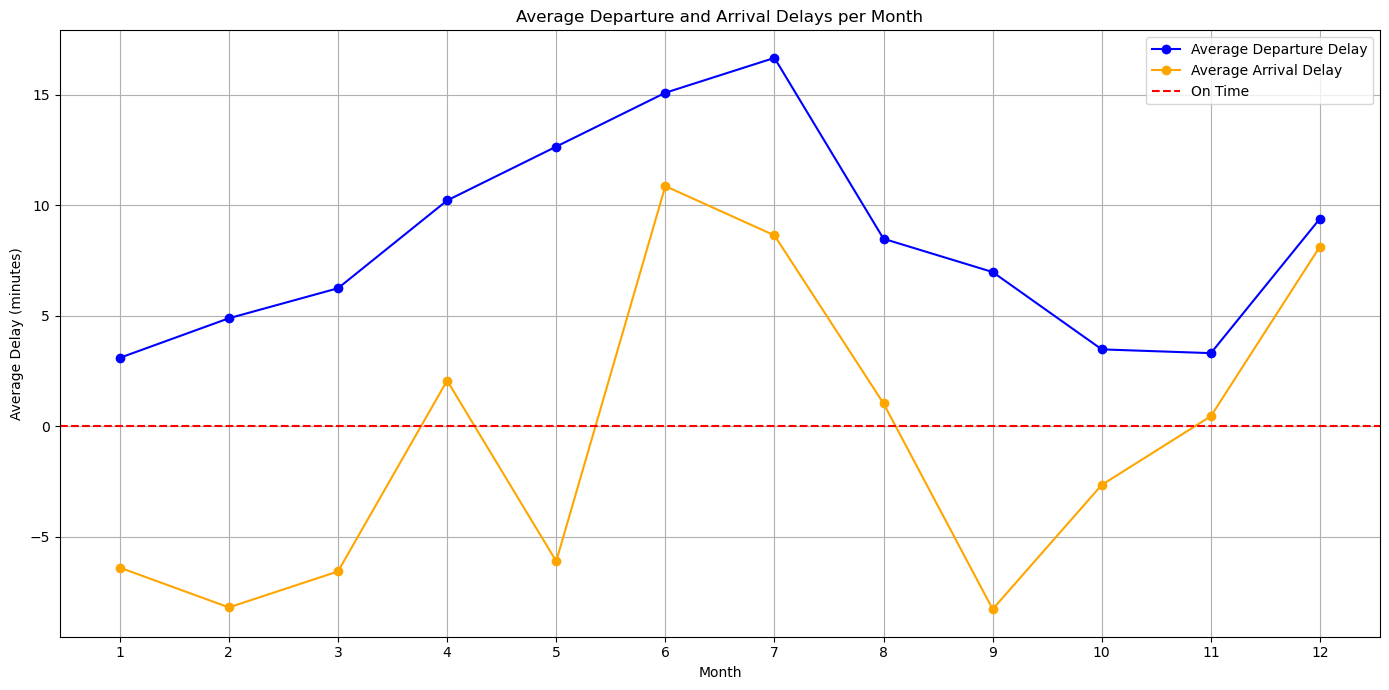

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'FLIGHT_csv_clean.csv'  # Replace with your actual file path
NYLA = pd.read_csv(file_path)

# Step 2: Convert the 'date' column to datetime format
NYLA['date'] = pd.to_datetime(NYLA['date'])  # Ensure this is the correct column

# Step 3: Extract month and year from the date column
NYLA['month'] = NYLA['date'].dt.month  # Extract month
NYLA['year'] = NYLA['date'].dt.year    # Extract year

# Step 4: Calculate average delays per month
average_delays_per_month = NYLA.groupby(['year', 'month'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Step 5: Rename columns for clarity
average_delays_per_month.columns = ['Year', 'Month', 'Average Departure Delay', 'Average Arrival Delay']

# Step 6: Visualize the average delays with a line chart
plt.figure(figsize=(14, 7))

# Plotting average departure delay
plt.plot(average_delays_per_month['Month'], average_delays_per_month['Average Departure Delay'], marker='o', label='Average Departure Delay', color='blue')

# Plotting average arrival delay
plt.plot(average_delays_per_month['Month'], average_delays_per_month['Average Arrival Delay'], marker='o', label='Average Arrival Delay', color='orange')

# Adding labels and title
plt.title('Average Departure and Arrival Delays per Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13), [f'{month}' for month in range(1, 13)])  # X-axis labels from 1 to 12
plt.axhline(0, color='red', linestyle='--', label='On Time')  # Reference line for on-time flights
plt.legend()
plt.grid()
plt.tight_layout()

# Step 7: Show the plot
plt.show()


In [70]:
import pandas as pd

# Load the dataset (assumes you have already loaded the dataset as 'NYLA')
file_path = 'FLIGHT_csv_clean.csv'  # Replace with your actual file path
NYLA = pd.read_csv(file_path)

# Step 1: Convert 'date' column to datetime format if not already done
NYLA['date'] = pd.to_datetime(NYLA['date'])

# Step 2: Extract year and week from the 'date' column
NYLA['week'] = NYLA['date'].dt.isocalendar().week
NYLA['year'] = NYLA['date'].dt.year

# Step 3: Calculate average departure and arrival delays per week
average_delays_per_week = NYLA.groupby(['year', 'week'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Step 4: Find the row with the maximum average departure delay
max_dep_delay_row = average_delays_per_week.loc[average_delays_per_week['dep_delay'].idxmax()]

# Step 5: Display the maximum departure delay and corresponding average arrival delay
print("Maximum Average Departure Delay:")
print(f"Year: {max_dep_delay_row['year']}, Week: {max_dep_delay_row['week']}")
print(f"Max Departure Delay (average): {max_dep_delay_row['dep_delay']}")
print(f"Corresponding Average Arrival Delay: {max_dep_delay_row['arr_delay']}")


Maximum Average Departure Delay:
Year: 2013.0, Week: 26.0
Max Departure Delay (average): 30.120535714285715
Corresponding Average Arrival Delay: 28.642857142857142


In [54]:
import pandas as pd

# Load the dataset (assumes you have already loaded the dataset as 'NYLA')
file_path = 'FLIGHT_csv_clean.csv'  # Replace with your actual file path
NYLA = pd.read_csv(file_path)

# Step 1: Convert 'date' column to datetime format if not already done
NYLA['date'] = pd.to_datetime(NYLA['date'])

# Step 2: Extract year and week from the 'date' column
NYLA['week'] = NYLA['date'].dt.isocalendar().week
NYLA['year'] = NYLA['date'].dt.year

# Step 3: Calculate average departure and arrival delays per week
average_delays_per_week = NYLA.groupby(['year', 'week'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Step 4: Find the row with the minimum average departure delay
min_dep_delay_row = average_delays_per_week.loc[average_delays_per_week['dep_delay'].idxmin()]

# Step 5: Display the minimum departure delay and corresponding average arrival delay
print("Minimum Average Departure Delay:")
print(f"Year: {min_dep_delay_row['year']}, Week: {min_dep_delay_row['week']}")
print(f"Min Departure Delay (average): {min_dep_delay_row['dep_delay']}")
print(f"Corresponding Average Arrival Delay: {min_dep_delay_row['arr_delay']}")

Minimum Average Departure Delay:
Year: 2013.0, Week: 47.0
Min Departure Delay (average): -0.8697674418604651
Corresponding Average Arrival Delay: 2.395348837209302
